# mnist 예제를 통해 간단한 서비스 모델 만들기

## 데이터 로드 및 탐색

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
#데이터 미리보기
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [6]:
mnist.target_names

['class']

## 데이터 전처리

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(mnist.data, mnist.target, test_size=0.1)

In [12]:
y_train.value_counts(sort=False) / y_train.shape[0]

0    0.098810
1    0.112270
2    0.099714
3    0.102063
4    0.097095
5    0.090238
6    0.098206
7    0.104540
8    0.097746
9    0.099317
Name: class, dtype: float64

## 모델 학습 및 평가

In [16]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

evals = [(X_test,y_test)]

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)

rf_accuracy = accuracy_score(y_test,rf_pred)
rf_accuracy

0.9688571428571429

In [22]:
lgbm_mapper = LGBMClassifier(n_estimators=400)
lgbm_mapper.fit(X_train,y_train,
                early_stopping_rounds=100,
                eval_metric='logloss',
                eval_set=evals,
                verbose=False)
lgbm_pred = lgbm_mapper.predict(X_test)

lgbm_accuracy = accuracy_score(y_test,lgbm_pred)
lgbm_accuracy

0.979

In [26]:
import numpy as np
import matplotlib.pyplot as plt

['7', '3', '1', '7', '6', '3', '5', '0', '2', '9']


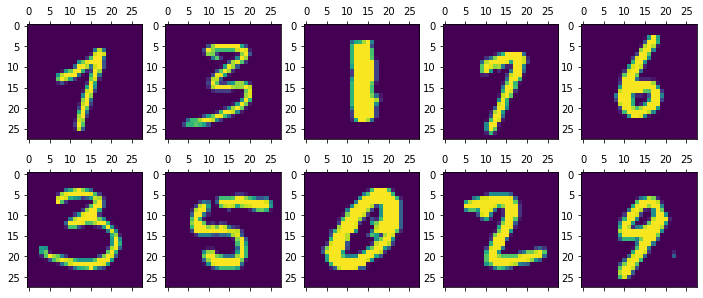

In [31]:
n_test = len(X_test)
random_pick = np.random.randint(0,n_test,10)


fig = plt.figure(figsize=(12,5))
axes = []

for i in range(1,11):
    axes.append(fig.add_subplot(2,5,i))

tmp_list = []

for i in range(10):
    tmp = X_test.iloc[random_pick[i]]
    tmp = tmp.values.reshape(28,28)
    tmp_list.append(tmp)
    
    
print(y_test.iloc[random_pick].tolist())

for i in range(10):
    axes[i].matshow(tmp_list[i])

In [32]:
import glob
from PIL import Image

['4'] ['2']


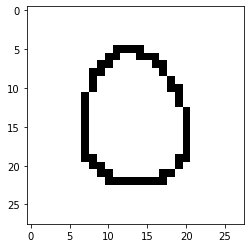

['5'] ['5']


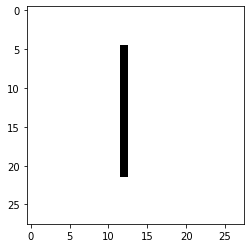

['7'] ['5']


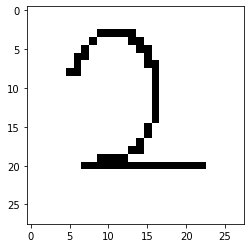

['7'] ['5']


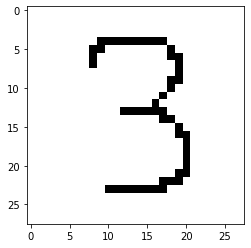

['7'] ['7']


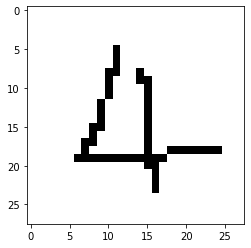

['7'] ['7']


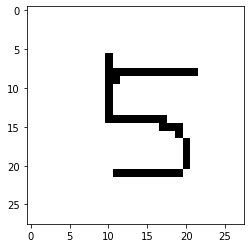

['5'] ['5']


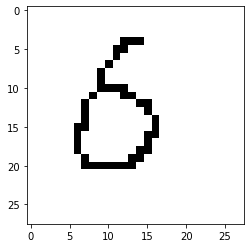

['7'] ['5']


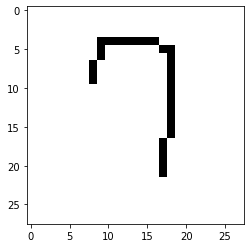

['5'] ['7']


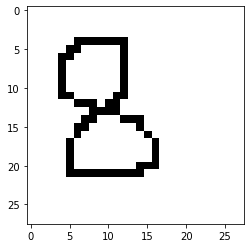

['5'] ['5']


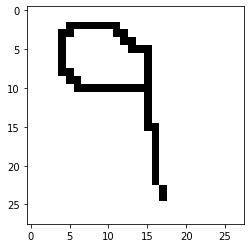

In [40]:
for path in glob.glob('./handwriting/*.png'):
    #print(path)
    img = Image.open(path)
    plt.imshow(img)
    img = np.resize(img,(1,784))
    img = 255 - (img)
    pred1 = rf_clf.predict(img)
    pred2 = lgbm_mapper.predict(img)
    print(pred1,pred2)
    plt.show()

In [41]:
import pickle

In [42]:
with open('model1.pkl','wb') as f:
    pickle.dump(rf_clf,f)

In [43]:
with open('model2.pkl','wb') as f:
    pickle.dump(lgbm_mapper,f)